In [18]:
import sys; sys.path.append("../../")
from DataPreprocessing.DataPreprocessing import *
from DataExploration import *
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

# Question:
    Predict sales of a game given release date, platform, publisher and developer



## 1- Expectations: 
    The model should determine the game characteristics through year,developed,publisher
    and platform that best predict that sales of a game.

## Read Data 

In [19]:
df = read_data(kind='dataset')
df = df.dropna()

## EDA

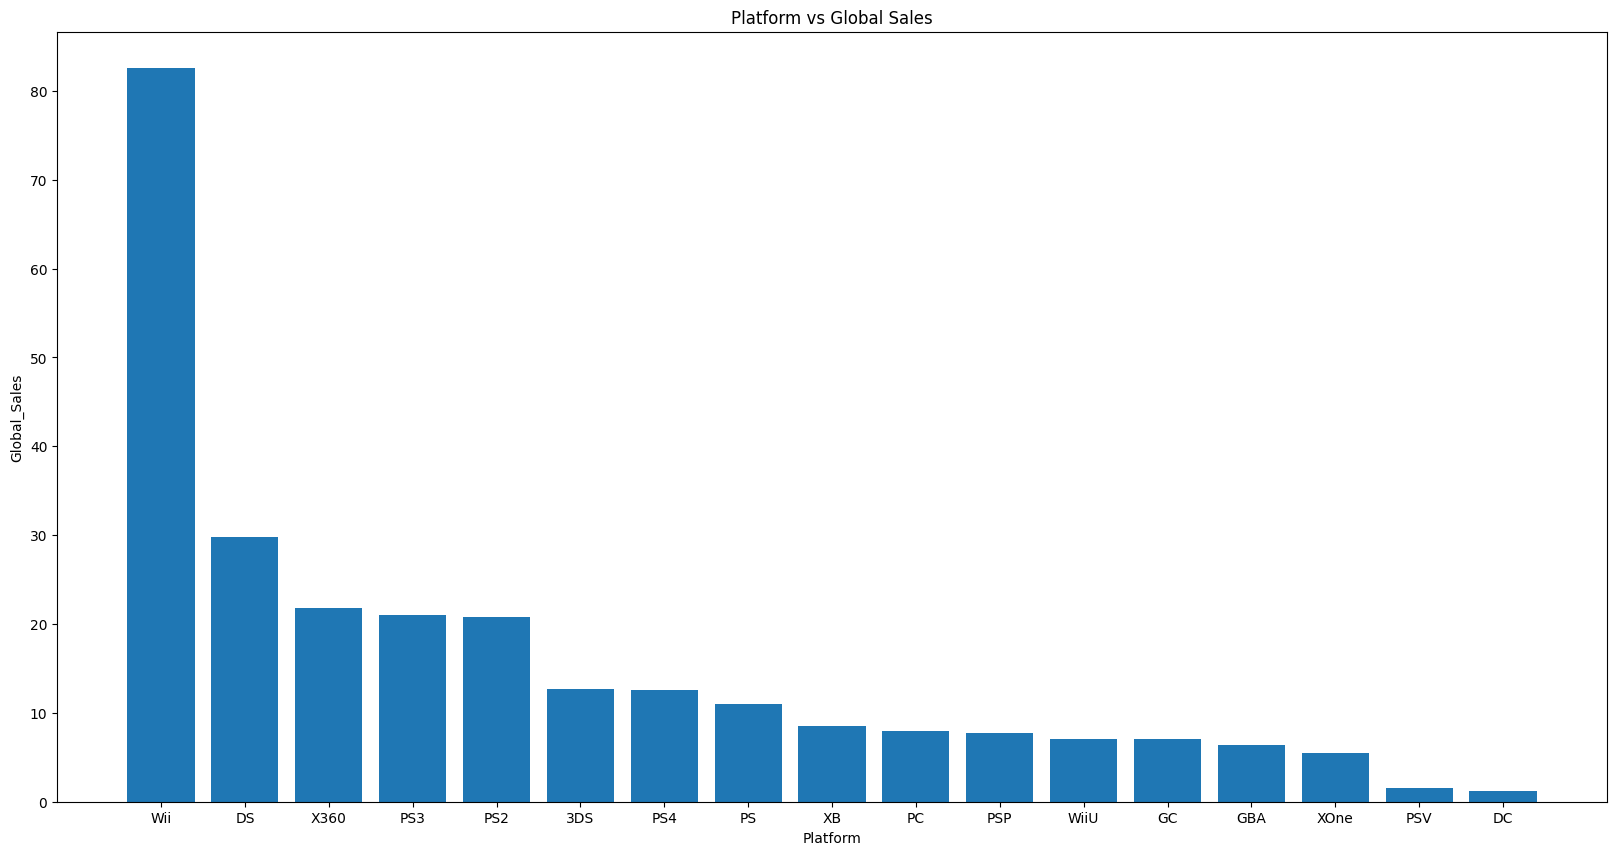

'from the below graph we see that platform with highest global sales is ????'

In [20]:
plot(df, 'Platform', 'Global_Sales', 'Platform vs Global Sales')
'''from the below graph we see that platform with highest global sales is ????'''

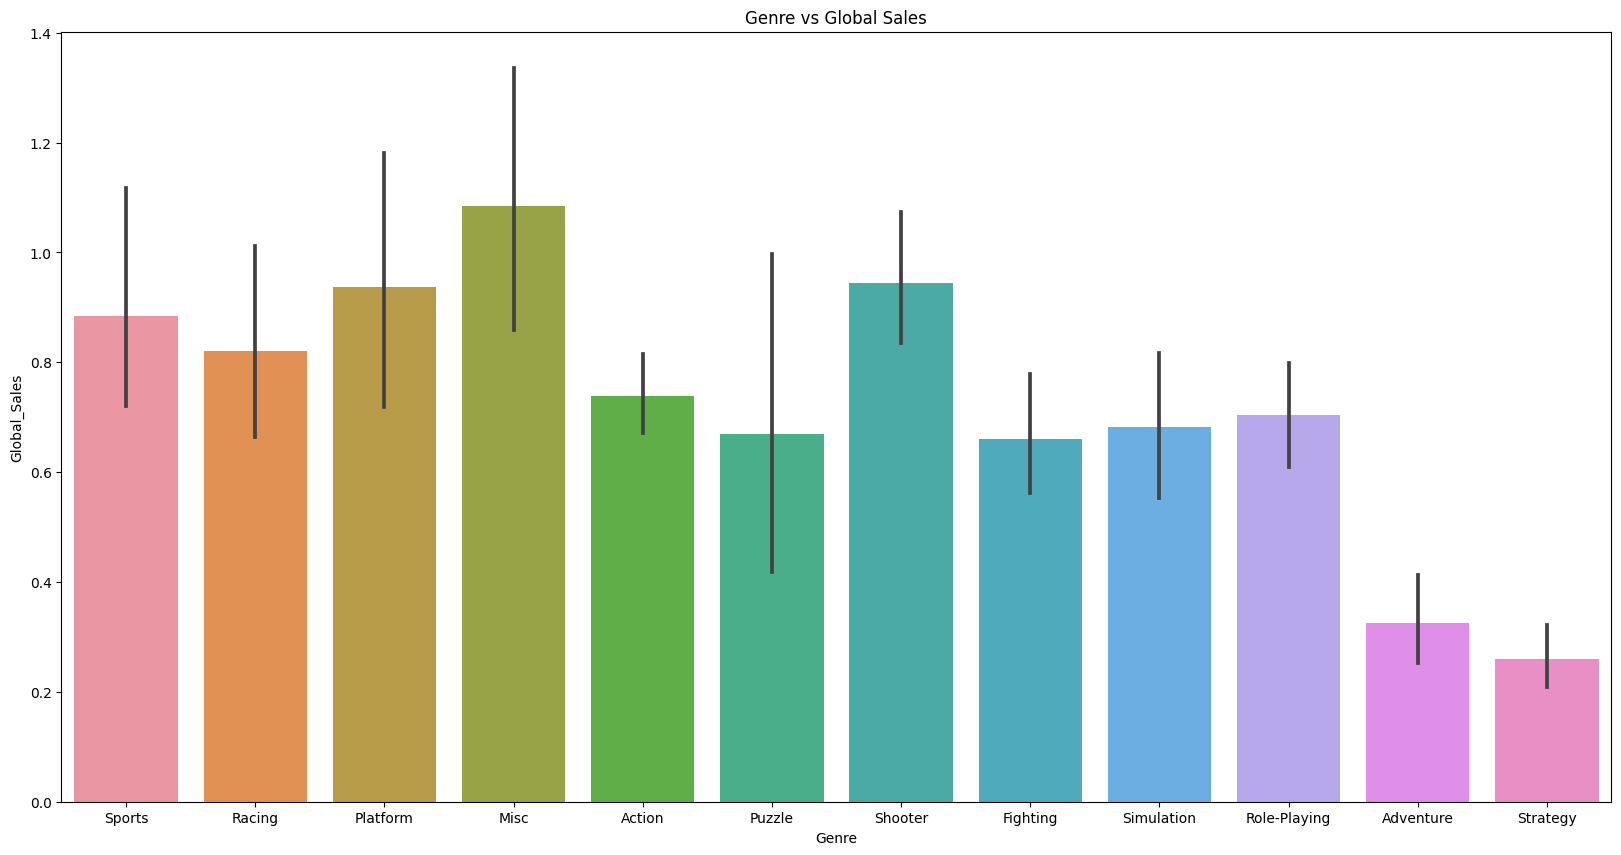

In [21]:
# plt Genre vs global sales
plt.figure(figsize=(20,10))
plt.title('Genre vs Global Sales')
sns.barplot(x='Genre', y='Global_Sales', data=df)
plt.show()
# Sales were highest for the  nd wii platforms and lowest for the PSV platform

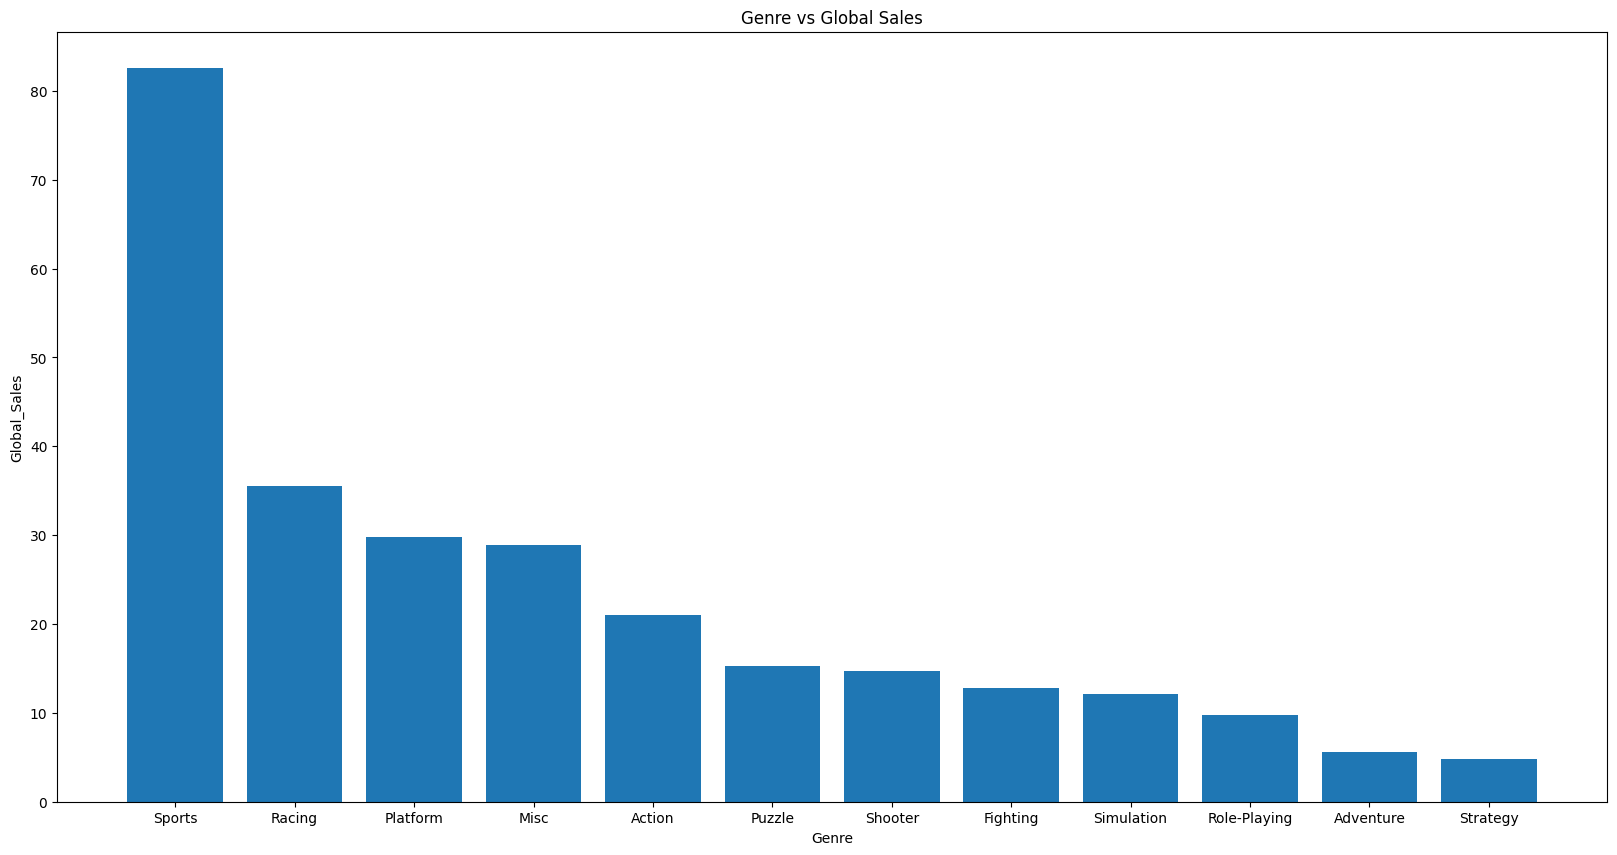

'from the below graph we see that global sales were highest for ?? genre'

In [22]:
plot(df, 'Genre', 'Global_Sales', 'Genre vs Global Sales')
'''from the below graph we see that global sales were highest for ?? genre'''

In [23]:
# get the genre with highest sales
df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(1)

Genre
Action    1203.16
Name: Global_Sales, dtype: float64

In [24]:
# read the data
df_train = read_data(kind='train')
df_val = read_data(kind='val')
# keep only the columns release year, publisher, developer,and platform 
df_train = df_train[['Year_of_Release', 'Publisher', 'Developer', 'Platform','Genre', 'Global_Sales']]
df_val = df_val[['Year_of_Release', 'Publisher', 'Developer', 'Platform', 'Genre','Global_Sales']]
df_train.head()

,Year_of_Release,Publisher,Developer,Platform,Genre,Global_Sales
0,2011.0,Cave,NaN,X360,Shooter,0.06
1,2014.0,Namco Bandai Games,Ganbarion,WiiU,Action,0.06
2,2006.0,Konami Digital Entertainment,Kojima Productions,DS,Role-Playing,0.23
3,2010.0,Yeti,NaN,PSP,Adventure,0.01
4,2008.0,Ubisoft,Ubisoft Montreal,X360,Action,1.59


## Handle Missing values


In [26]:
# handle missing values
df_train =handle_missing_values(df_train, handling_method='mode',neighbors=5)
df_val =handle_missing_values(df_val,handling_method='mode',neighbors=5)
df_train.head()

Total Number of rows : 10031
Number of rows with missing values: 4121
Total Number of rows : 3344
Number of rows with missing values: 1353


,Year_of_Release,Publisher,Developer,Platform,Genre,Global_Sales
0,2011.0,Cave,Ubisoft,X360,Shooter,0.06
1,2014.0,Namco Bandai Games,Ganbarion,WiiU,Action,0.06
2,2006.0,Konami Digital Entertainment,Kojima Productions,DS,Role-Playing,0.23
3,2010.0,Yeti,Ubisoft,PSP,Adventure,0.01
4,2008.0,Ubisoft,Ubisoft Montreal,X360,Action,1.59


## prepare features and labels

In [27]:
y_train = df_train['Global_Sales']
X_train = df_train.drop('Global_Sales', axis=1)
y_val = df_val['Global_Sales']
X_val = df_val.drop('Global_Sales', axis=1)
X_train.head()


In [31]:
X_train.isnull().sum()  


Year_of_Release    0
Publisher          0
Developer          0
Platform           0
Genre              0
dtype: int64

# Models

## catboost Model

In [ ]:
# !pip install catboost

In [32]:
import catboost as cat
cat_feat =[ 'Publisher', 'Developer', 'Platform','Genre',]
model = cat.CatBoostRegressor(random_state=100,cat_features=cat_feat,verbose=0)
model.fit(X_train ,y_train)

### Model Accuracy

In [33]:
y_pred = model.predict(X_val)

In [34]:
rmse = sqrt(mean_squared_error(y_val, y_pred))
print(rmse)

1.0046751594678969


In [35]:
print("R2 score =", round(sm.r2_score( y_val, y_pred), 2))


R2 score = 0.12


In [ ]:
# Import library
# Building elastic net regression model with hyperparameter alpha = 0.1
regr = ElasticNet(alpha=0.1)
# Prepare input data
regr.fit(X_train, y_train)
regr.score(X_train, y_train)
regr.coef_
# array([0.66666667, 1.79069767])
regr.intercept_
y_predicted =regr.predict(X_val)
print("R2 score =", round(sm.r2_score( y_val, y_predicted), 2))



R2 score = 0.01


# Encoding for cat features 

## ElasticNet Model

# Regression Model

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.022190969143183747

In [ ]:
y_predicted =reg.predict(X_val)
# compute accuracy
print("R2 score =", round(sm.r2_score( y_val, y_predicted), 2))



R2 score = 0.05


## 3- Comparing Expectations to data:
        from the plot we can see that there is a significant difference between
        the mean global sales of games for each publisher.
        So Expectations match data.
